<h2 align="center"> Classifying Digikala Comments Using Text Classification and Naive Bayes AI</h2>

<h3 align="center"> University of Tehran </h3>

<h3> Introduction </h3>

In this assignment we're given a train set of datas and with using naive bayes we should train our model so we can then classify a given content into one of these four titles:
- Art & Cinema
- Sciene & Technology
- Video Games
- Health & Beauty


In [1]:
from hazm import Normalizer, word_tokenize, Lemmatizer, Stemmer, stopwords_list
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import math
import numpy as np
import pandas as pd
import os

In [2]:
VIDEO_GAMES = 'بازی ویدیویی'
ART_AND_CINEMT = 'هنر و سینما'
HEALTH_AND_BEAUTY = 'سلامت و زیبایی'
SCIENCE_AND_TECHNOLOGY = 'علم و تکنولوژی'

VIDEO_GAMES_INDEX = 0
ART_AND_CINEMA_INDEX = 1
HEALTH_AND_BEAUTY_INDEX = 2
SCIENCE_AND_TECHNOLOGY_INDEX = 3

persian_stop_words = {'،', 'به', 'که', 'در', 'و', 'این', '.', 'از', 'ما', 'با', 'تا', 'یا', 'آن', 'را', ':', 'داشت', 'است', 'برای', 'دار', 'شد', 'کرد', 'کن', 'یک', ')', '(', ':', '!', '?', '؛', '؟', 'آن‌ها', 'ها'}

TRAIN_SET_PATH = 'train.csv'
DATA_SET_PATH = 'test.csv'

<h3> Pre Processing and Cleaning the Data </h3>

In this phase we are going to do the following steps.

Extract csv files:

In [3]:
train_set = pd.read_csv(TRAIN_SET_PATH)
test_set = pd.read_csv(DATA_SET_PATH)

Split train data into test and train set:

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5199 non-null   object
 1   label    5200 non-null   object
dtypes: object(2)
memory usage: 81.4+ KB


In [5]:
train_set.dropna(inplace=True)

<h3>Pre Processing Class</h3>

In this class we are going to **normalize**, **tokenize** our content and **remove stop words** so we can have a clean train set for our classification.

In [6]:
class Pre_Processor:
    def __init__(self, X):
        self.X_copy = X.copy()
        
    def normalize(self):
        self.normalizer = Normalizer()
        self.X_copy['content'] = self.X_copy['content'].apply(self.normalizer.normalize)
    
    def tokenize(self):
        self.X_copy['content'] = self.X_copy['content'].apply(word_tokenize)
    
    def remove_stop_words(self):
        self.stop_words = stopwords_list()
        self.X_copy['content'] = self.X_copy.apply(lambda x: [word for word in x['content'] if word not in self.stop_words and word not in persian_stop_words and not word.isdigit()], axis=1)
    
    def lemmatizing(self, l):
        return [self.lemmatizer.lemmatize(i) for i in l]
        
    def lemmatize(self):
        self.lemmatizer = Lemmatizer()
        self.X_copy['content'] = self.X_copy['content'].apply(self.lemmatizing)
    
    def stemmering(self, l):
        return [self.stemmer.stem(i) for i in l]
    
    def stemmerize(self):
        self.stemmer = Stemmer()
        self.X_copy['content'] = self.X_copy['content'].apply(self.stemmering)
    
    def apply_pre_process(self):
        self.normalize()
        self.tokenize()
        self.remove_stop_words()
        
    def get_pre_processed_text(self):
        return self.X_copy

In [7]:
pre_processor = Pre_Processor(train_set)
pre_processor.apply_pre_process()
text = pre_processor.get_pre_processed_text()
text.head()

,content,label
0,"[فیلم‌های, اکران, موزیکال, شاد, خاله, قورباغه,...",هنر و سینما
1,"[فیلمسازی, کوئنتین, تارانتینو, عاشق, سینما, کم...",هنر و سینما
2,"[جانی, آیو, اپل, جانی, آیو, نیازی, معرفی, تقری...",علم و تکنولوژی
3,"[احتمال, پشتیبانی, iOS, آیفون, اس, SE, آیفون, ...",علم و تکنولوژی
4,"[دزدان, مغازه, نماینده, ژاپن, اسکار, فیلم, سین...",هنر و سینما


In [8]:
class frequency_matrix:
    def __init__(self):
        self.word_set = defaultdict(int)
        
    def count_vectorization(self, X):
        X_copy = X.copy()
        for index, text in X_copy.content.iteritems():
            for word in text:
                if word not in persian_stop_words:
                    if word in self.word_set:
                        count_word = self.word_set[word]
                        count_word += 1
                        self.word_set[word] = count_word
                    else:
                        self.word_set[word] = 1
            
    def print_sorted_matrix(self):
        for word in sorted(self.word_set, key=self.word_set.get, reverse=True):
            print(word, self.word_set[word])
        print()
        print()
        
    def get_dic(self):
        return self.word_set
            

In [9]:
video_games_df = text[text['label'] == VIDEO_GAMES]
art_and_cinema_df = text[text['label'] == ART_AND_CINEMT]
health_and_beauty_df = text[text['label'] == HEALTH_AND_BEAUTY]
science_and_technology_df = text[text['label'] == SCIENCE_AND_TECHNOLOGY]

In [10]:
class create_plot:
    def __init__(self, df, category):
        self.df = df
        self.category = category
        self.freq_mat = frequency_matrix()
        self.freq_mat.count_vectorization(self.df)
        self.first_five = Counter(self.freq_mat.get_dic()).most_common(5)
    
    def show_plot(self):
        label = list(zip(*self.first_five))[0]
        word = list(zip(*self.first_five))[1]
        x_pos = np.arange(len(label)) 

        plt.bar(x_pos, word,align='center')
        plt.xticks(x_pos, label) 
        plt.ylabel('Most Common Words')
        plt.xlabel(self.category)
        plt.show()

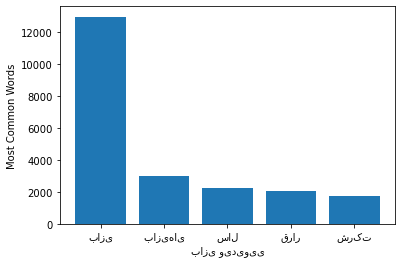

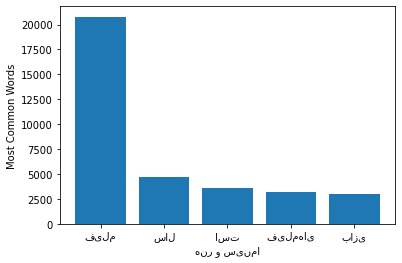

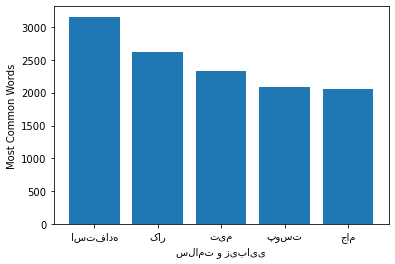

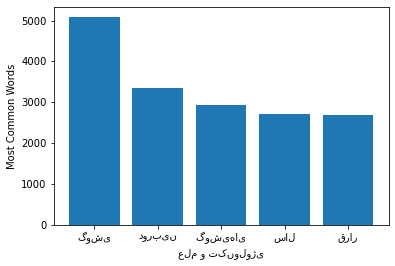

In [11]:
create_plot(video_games_df, VIDEO_GAMES).show_plot()
create_plot(art_and_cinema_df, ART_AND_CINEMT).show_plot()
create_plot(health_and_beauty_df, HEALTH_AND_BEAUTY).show_plot()
create_plot(science_and_technology_df, SCIENCE_AND_TECHNOLOGY).show_plot()

In [12]:
class Classifier:
    def __init__(self, train_df, test_df):
        self.train_df = train_df
        self.test_df = test_df
        
        self.train_word_count = self.calculate_word_count(self.train_df)
        self.test_word_count = self.calculate_word_count(self.test_df)
        
        self.video_games_word_frequency = defaultdict(int)
        self.art_and_cinema_word_frequency = defaultdict(int)
        self.health_and_beauty_word_frequency = defaultdict(int)
        self.science_and_technology_word_frequency = defaultdict(int)
        
        self.likelihood_prob_video = defaultdict(int)
        self.likelihood_prob_art = defaultdict(int)
        self.likelihood_prob_health = defaultdict(int)
        self.likelihood_prob_science = defaultdict(int)
        
        self.prior_prob_video = None
        self.prior_prob_art = None
        self.prior_prob_health = None
        self.prior_prob_science = None
        
    def calculate_word_count(self, df):
        video_count = len(df[df['label'] == VIDEO_GAMES])
        art_count = len(df[df['label'] == ART_AND_CINEMT])
        health_count = len(df[df['label'] == HEALTH_AND_BEAUTY])
        science_count = len([df['label'] == SCIENCE_AND_TECHNOLOGY])
        
        return video_count + art_count + health_count + science_count
    
    def calculate_prior_prob(self, df, label, word_count):
        return len(df[df['label'] == label]) / word_count
    
    def calculate_likelihood_prob(self, additive_smoothing=False):
        alpha = 0
        if additive_smoothing:
            alpha = 1
        self.video_words_count = sum(self.video_games_word_frequency.values())
        for word, freq in self.video_games_word_frequency.items():
            self.likelihood_prob_video[word] = (freq + alpha) / (self.video_words_count + self.video_words_count * alpha)
            
        self.art_words_count = sum(self.art_and_cinema_word_frequency.values())
        for word, freq in self.art_and_cinema_word_frequency.items():
            self.likelihood_prob_art[word] = (freq + alpha) / (self.art_words_count + self.art_words_count * alpha)
        
        self.health_words_count = sum(self.health_and_beauty_word_frequency.values())
        for word, freq in self.health_and_beauty_word_frequency.items():
            self.likelihood_prob_health[word] = (freq + alpha) / (self.health_words_count + self.health_words_count * alpha)
        
        self.science_words_count = sum(self.science_and_technology_word_frequency.values())
        for word, freq in self.science_and_technology_word_frequency.items():
            self.likelihood_prob_science[word] = (freq + alpha) / (self.science_words_count + self.science_words_count * alpha)
    
    def calculate_words_frequency(self, df, label):
        for words in df[df['label'] == label]['content']:
            for word in words:
                if label == VIDEO_GAMES:
                    if (word not in self.video_games_word_frequency):
                        self.video_games_word_frequency[word] = 0
                    else:
                        self.video_games_word_frequency[word] += 1
            
                elif label == ART_AND_CINEMT:
                    if (word not in self.art_and_cinema_word_frequency):
                        self.art_and_cinema_word_frequency[word] = 0
                    else:
                        self.art_and_cinema_word_frequency[word] += 1
            
                elif label == HEALTH_AND_BEAUTY:
                    if (word not in self.health_and_beauty_word_frequency):
                        self.health_and_beauty_word_frequency[word] = 0
                    else:
                        self.health_and_beauty_word_frequency[word] += 1
            
                elif label == SCIENCE_AND_TECHNOLOGY:
                    if (word not in self.science_and_technology_word_frequency):
                        self.science_and_technology_word_frequency[word] = 0
                    else:
                        self.science_and_technology_word_frequency[word] += 1
                
                if (word not in self.video_games_word_frequency):
                    self.video_games_word_frequency[word] = 0
                        
                if (word not in self.art_and_cinema_word_frequency):
                    self.art_and_cinema_word_frequency[word] = 0
                    
                if (word not in self.health_and_beauty_word_frequency):
                    self.health_and_beauty_word_frequency[word] = 0
                    
                if (word not in self.science_and_technology_word_frequency):
                    self.science_and_technology_word_frequency[word] = 0

    
    def train(self, additive_smoothing=False):
        self.calculate_words_frequency(self.train_df, VIDEO_GAMES)
        self.calculate_words_frequency(self.train_df, ART_AND_CINEMT)
        self.calculate_words_frequency(self.train_df, HEALTH_AND_BEAUTY)
        self.calculate_words_frequency(self.train_df, SCIENCE_AND_TECHNOLOGY)
        
        self.prior_prob_video = self.calculate_prior_prob(self.train_df, VIDEO_GAMES, self.train_word_count)
        self.prior_prob_art = self.calculate_prior_prob(self.train_df, ART_AND_CINEMT, self.train_word_count)
        self.prior_prob_health = self.calculate_prior_prob(self.train_df, HEALTH_AND_BEAUTY, self.train_word_count)
        self.prior_prob_science = self.calculate_prior_prob(self.train_df, SCIENCE_AND_TECHNOLOGY, self.train_word_count)
        
        self.calculate_likelihood_prob(additive_smoothing)

        
        
    
    def run(self):
        self.test_df["prediction"] = self.test_df.apply(lambda row: self.predict(row['content']), axis=1)
        return self.test_df
    
    def predict(self, words):
        sum_video = math.log(self.prior_prob_video)
        sum_art = math.log(self.prior_prob_art)
        sum_health = math.log(self.prior_prob_health)
        sum_science = math.log(self.prior_prob_science)

        for word in words:
            if word not in self.likelihood_prob_video and word not in self.likelihood_prob_art and word not in self.likelihood_prob_health and word not in self.likelihood_prob_science:
                continue
            
            if word not in self.likelihood_prob_video:
                rec_score = float('-inf')
                break

            if word not in self.likelihood_prob_art:
                not_rec_score = float('-inf')
                break
                
            if word not in self.likelihood_prob_health:
                rec_score = float('-inf')
                break

            if word not in self.likelihood_prob_science:
                not_rec_score = float('-inf')
                break
            
            sum_video += math.log(self.likelihood_prob_video[word] / self.video_words_count)
            sum_art += math.log(self.likelihood_prob_art[word] / self.art_words_count)
            sum_health += math.log(self.likelihood_prob_health[word] / self.health_words_count)
            sum_science += math.log(self.likelihood_prob_science[word] / self.science_words_count)
                
                    
        categories = [sum_video, sum_art, sum_health, sum_science]
        labels = [VIDEO_GAMES, ART_AND_CINEMT, HEALTH_AND_BEAUTY, SCIENCE_AND_TECHNOLOGY]
        
        return labels[np.argmax(categories)]
              
    
        

In [13]:
test_pre_processor = Pre_Processor(test_set)
test_pre_processor.apply_pre_process()
test_text = test_pre_processor.get_pre_processed_text()
classifier = Classifier(text, test_text)
classifier.train(additive_smoothing=True)

In [14]:
predicted_df = classifier.run()
predicted_df.head(25)

,content,label,prediction
0,"[صبحانه, رژیمی, لاغر, شوید, صبحانه, عنوان, مهم...",سلامت و زیبایی,سلامت و زیبایی
1,"[نمایشگر, گوشی, تاشونده, ال‌جی, بروشور, بسته_م...",علم و تکنولوژی,علم و تکنولوژی
2,"[سلبریتی‌های, هالیوودی, شبکه‌های, اجتماعی, متن...",هنر و سینما,بازی ویدیویی
3,"[گوگل, استیدیا, آینده‌ی, صنعت, بازی, محکوم, شک...",بازی ویدیویی,بازی ویدیویی
4,"[ویژگی, جذاب, گلکسی, Z, Flip, زودی, گوشی‌های, ...",علم و تکنولوژی,علم و تکنولوژی
5,"[وان, پلاس, ۷T, پرو, رنگ, آبی, مه‌, آلود, تولی...",علم و تکنولوژی,علم و تکنولوژی
6,"[آیفون, پرو, پرو, مکس, دوربین, ToF, عرضه, بررس...",علم و تکنولوژی,علم و تکنولوژی
7,"[شکست, تاریخ, پیکسار, رقم, می‌خورد, بررسی, فیل...",هنر و سینما,هنر و سینما
8,"[گفتید, بازی, قالب, مطلب, بگویید, هفته‌ی, گذشت...",بازی ویدیویی,بازی ویدیویی
9,"[حالت, بتل, رویال, بازی, Dying, Light, ماه, آی...",بازی ویدیویی,بازی ویدیویی


In [17]:
class Evaluation:
    def __init__(self, predicted_df):
        self.predicted_df = predicted_df
        
        self.accuracy = None
        self.macro = None
        self.f1_weighted = None
        
        self.video_precision = None
        self.art_precision = None
        self.health_precision = None
        self.science_precision = None
        
        self.video_recall = None
        self.art_recall = None
        self.health_recall = None
        self.science_recall = None
        
        self.video_f1_score = None
        self.art_f1_score = None
        self.health_f1_score = None
        self.science_f1_score = None
    
    def calculate_accuracy(self):
        similarity = self.predicted_df["label"] == self.predicted_df["prediction"]
        row_occurrences = np.count_nonzero(similarity == True, axis=0)
        self.accuracy = row_occurrences / self.predicted_df.shape[0]
    
    def calculate_precision(self):
        correct_video_count = len(self.predicted_df[(self.predicted_df['label'] == VIDEO_GAMES) & (self.predicted_df['prediction'] == VIDEO_GAMES)])
        all_detected_video_count = len(self.predicted_df[self.predicted_df["prediction"] == VIDEO_GAMES])
        self.video_precision =  correct_video_count/all_detected_video_count
        
        correct_art_count = len(self.predicted_df[(self.predicted_df['label'] == ART_AND_CINEMT) & (self.predicted_df['prediction'] == ART_AND_CINEMT)])
        all_detected_art_count = len(self.predicted_df[self.predicted_df["prediction"] == ART_AND_CINEMT])
        self.art_precision =  correct_art_count/all_detected_art_count
        
        correct_health_count = len(self.predicted_df[(self.predicted_df['label'] == HEALTH_AND_BEAUTY) & (self.predicted_df['prediction'] == HEALTH_AND_BEAUTY)])
        all_detected_health_count = len(self.predicted_df[self.predicted_df["prediction"] == HEALTH_AND_BEAUTY])
        self.health_precision =  correct_health_count/all_detected_health_count
        
        correct_science_count = len(self.predicted_df[(self.predicted_df['label'] == SCIENCE_AND_TECHNOLOGY) & (self.predicted_df['prediction'] == SCIENCE_AND_TECHNOLOGY)])
        all_detected_science_count = len(self.predicted_df[self.predicted_df["prediction"] == SCIENCE_AND_TECHNOLOGY])
        self.science_precision =  correct_science_count/all_detected_science_count
    
    
    def calculate_recall(self):
        correct_video_count = len(self.predicted_df[(self.predicted_df['label'] == VIDEO_GAMES) & (self.predicted_df['prediction'] == VIDEO_GAMES)])
        total_video = len(self.predicted_df[self.predicted_df["label"] == VIDEO_GAMES])
        self.video_recall =  correct_video_count/total_video
        
        correct_art_count = len(self.predicted_df[(self.predicted_df['label'] == ART_AND_CINEMT) & (self.predicted_df['prediction'] == ART_AND_CINEMT)])
        total_art = len(self.predicted_df[self.predicted_df["label"] == ART_AND_CINEMT])
        self.art_recall =  correct_art_count/total_art
        
        correct_health_count = len(self.predicted_df[(self.predicted_df['label'] == HEALTH_AND_BEAUTY) & (self.predicted_df['prediction'] == HEALTH_AND_BEAUTY)])
        total_health = len(self.predicted_df[self.predicted_df["label"] == HEALTH_AND_BEAUTY])
        self.health_recall =  correct_health_count/total_health
        
        correct_science_count = len(self.predicted_df[(self.predicted_df['label'] == SCIENCE_AND_TECHNOLOGY) & (self.predicted_df['prediction'] == SCIENCE_AND_TECHNOLOGY)])
        total_science = len(self.predicted_df[self.predicted_df["label"] == SCIENCE_AND_TECHNOLOGY])
        self.science_recall =  correct_science_count/total_science
    
    def f1_score(self, precision, recall):
        return (2* ((precision*recall)/(precision+recall)))
    
    def calculate_f1_score(self):
        self.video_f1_score = self.f1_score(self.video_precision, self.video_recall)
        self.art_f1_score = self.f1_score(self.art_precision, self.art_recall)
        self.health_f1_score = self.f1_score(self.health_precision, self.health_recall)
        self.science_f1_score = self.f1_score(self.science_precision, self.science_recall)
    
    def calculate_f1_macro(self):
        f1_scores = [self.video_f1_score, self.art_f1_score, self.health_f1_score, self.science_f1_score]
        self.macro = np.mean(f1_scores)
    
    def calcualte_f1_weighted(self):
        score = 0
        
        score += self.video_f1_score * (self.predicted_df['label'] == VIDEO_GAMES).sum()
        score += self.art_f1_score * (self.predicted_df['label'] == ART_AND_CINEMT).sum()
        score += self.health_f1_score * (self.predicted_df['label'] == HEALTH_AND_BEAUTY).sum()
        score += self.science_f1_score * (self.predicted_df['label'] == SCIENCE_AND_TECHNOLOGY).sum()
        
        self.f1_weighted = score/self.predicted_df['label'].count()
    
    def evaluate(self):
        self.calculate_accuracy()
        self.calculate_precision()
        self.calculate_recall()
        self.calculate_f1_score()
        self.calculate_f1_macro()
        self.calcualte_f1_weighted()

    
    def print_evaluation(self):
        print("ACCURACY: " + "{:.2f}".format(self.accuracy * 100))
        print("MACRO: " + "{:.2f}".format(self.macro * 100))
        print("WEIGHTED: " + "{:.2f}".format(self.f1_weighted * 100))
        print()
        print("VIDEO GAMES")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.video_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.video_recall * 100))
        print("F1: " + "{:.2f}".format(self.video_f1_score * 100))
        print("**************************************")
        print()
        print("ART AND CINEMA")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.art_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.art_recall * 100))
        print("F1: " + "{:.2f}".format(self.art_f1_score * 100))
        print("**************************************")
        print()
        print("HEALTH AND BEAUTY")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.health_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.health_recall * 100))
        print("F1: " + "{:.2f}".format(self.health_f1_score * 100))
        print("**************************************")
        print()
        print("SCIENCE AND TECHNOLOGY")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.science_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.science_recall * 100))
        print("F1: " + "{:.2f}".format(self.science_f1_score * 100))
        print("**************************************")
        
    
        
        
        
        

# EVALUATION 

In [18]:
evaluation = Evaluation(predicted_df)
evaluation.evaluate()
evaluation.print_evaluation()

ACCURACY: 91.65
MACRO: 91.14
WEIGHTED: 91.75

VIDEO GAMES
**************************************
PRECISION: 78.14
RECALL: 97.97
F1: 86.94
**************************************

ART AND CINEMA
**************************************
PRECISION: 98.55
RECALL: 81.44
F1: 89.18
**************************************

HEALTH AND BEAUTY
**************************************
PRECISION: 98.57
RECALL: 85.71
F1: 91.69
**************************************

SCIENCE AND TECHNOLOGY
**************************************
PRECISION: 96.75
RECALL: 96.75
F1: 96.75
**************************************


<h3> QUESTIONS </h3>

- Lemmatization or Stemming?
    - Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.
    - Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
    
<br>

- What are (evidence, likelihood, prior, posterior) in Naive Bayes and how are they calculated?
    - Evidence: P(fi), it is the happened features. We do not calculate this phrase.
    - Likelihood: P(fi|Y) is the likelihood that shows how much is the probability of seeing a word by knowing video game/art and cinema/health and beauty/science and technology class.
    - Prior: P(Y) shows the prior probability and it shows our first view of the world without any further evidence. It just simply shows how many video games or art and cinema or health and beauty or science and technology words are in our train dataset divided by count of all rows in our data
    - Posterior: P(Y|features) shows the posterior probability. It means that our view has been changed by these new evidences.
    
- The word "dream" in "I dream at night" and "I have a big dream about my future" are different from each other.

- Why we use Additive Smoothing:
    - Additive smoothing allows the assignment of non-zero probabilities to words which do not occur in the sample.
    - It can mess up our prediction if we don't use it
   
- Why precision alone is not enough? 
    - Precision alone is not enough to describe the performance of a classifier. A classifier with high recall misses very few correct answers.
    
    